## <background color="k"><font color="#ff7823">**Build a forecast model to predict the furniture sales of a certain store**

In [19]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller,acf,pacf


from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel("DS3_C6_S4_TimeSeries_Sales_Data_Project.xls",index_col="Order Date",parse_dates=True)
data

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [3]:
furniture_sales = data[data.Category=="Furniture"].groupby("Order Date").sum("Sales")["Sales"]
furniture_sales = furniture_sales.resample('D').sum()
furniture_sales

Order Date
2014-01-06    2573.8200
2014-01-07      76.7280
2014-01-08       0.0000
2014-01-09       0.0000
2014-01-10      51.9400
                ...    
2017-12-26       0.0000
2017-12-27       0.0000
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Freq: D, Name: Sales, Length: 1455, dtype: float64

In [4]:
def time_series_analysis_plot(df,period):        
    decomposition=seasonal_decompose(np.asarray(df), period=period)
    d_trend=decomposition.trend
    d_seasonal=decomposition.seasonal
    d_residual=decomposition.resid

    # plotting all the 4 graphs
    fig,ax = plt.subplots(4,1,figsize=(20,12))

    plt.subplot(411)
    plt.plot(df,label='Sales Data - as it is');
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(d_trend,label='Trend')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(d_seasonal,label='Seasonal')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(d_residual,label='Residual')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

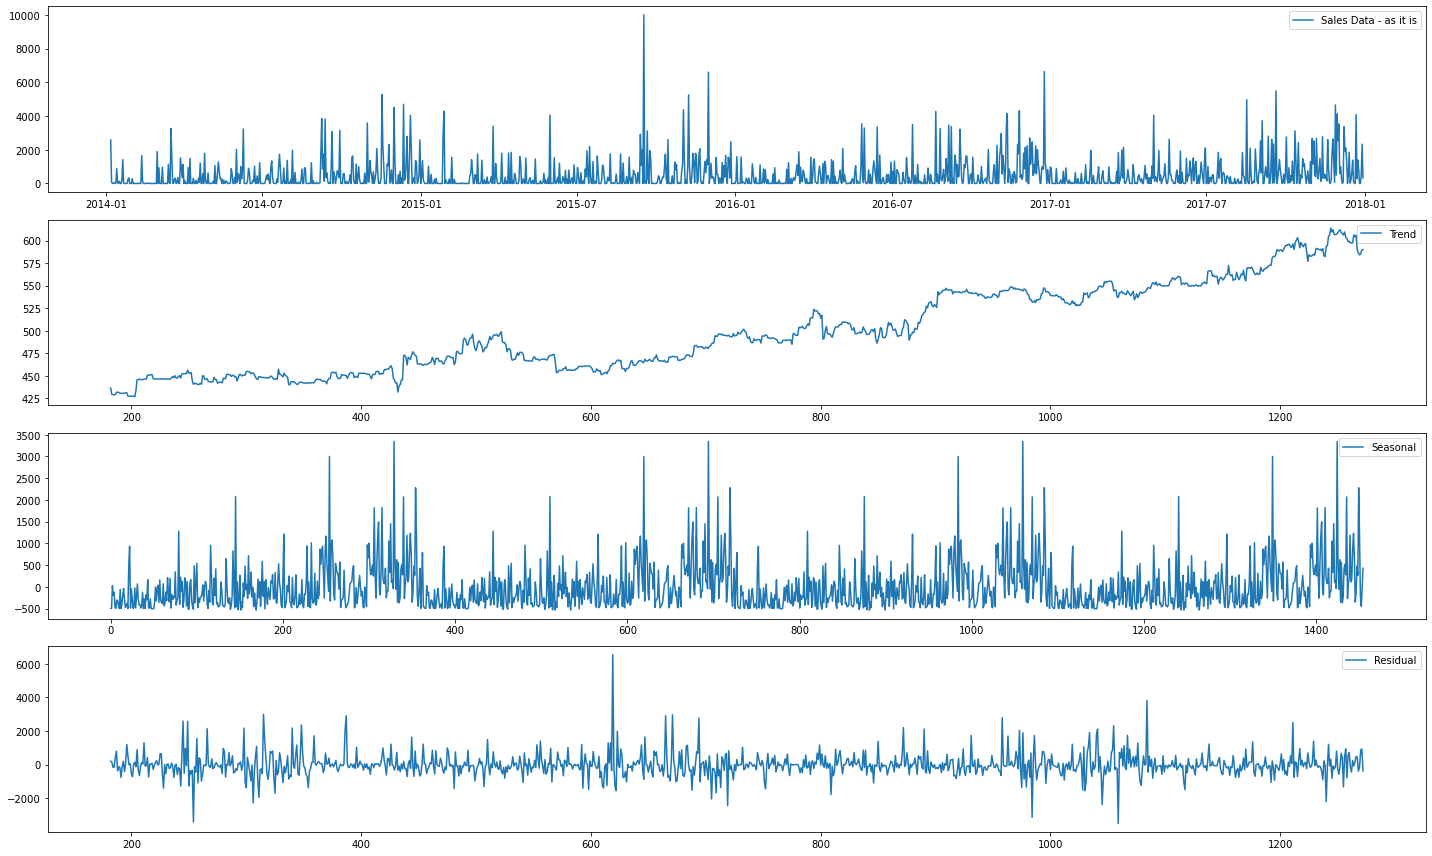

In [5]:
time_series_analysis_plot(furniture_sales,365)

* ####  **Here the data is very spiky and we cannot make accurate predictions as the day is daily and many days sales is zero**
* ####  **Thus we need to Resample the Data either monthly or weekly**

In [77]:
q_sales = furniture_sales.resample('Q').sum()
q_sales.size

16

In [75]:
monthly_sales = furniture_sales.resample('M').sum()

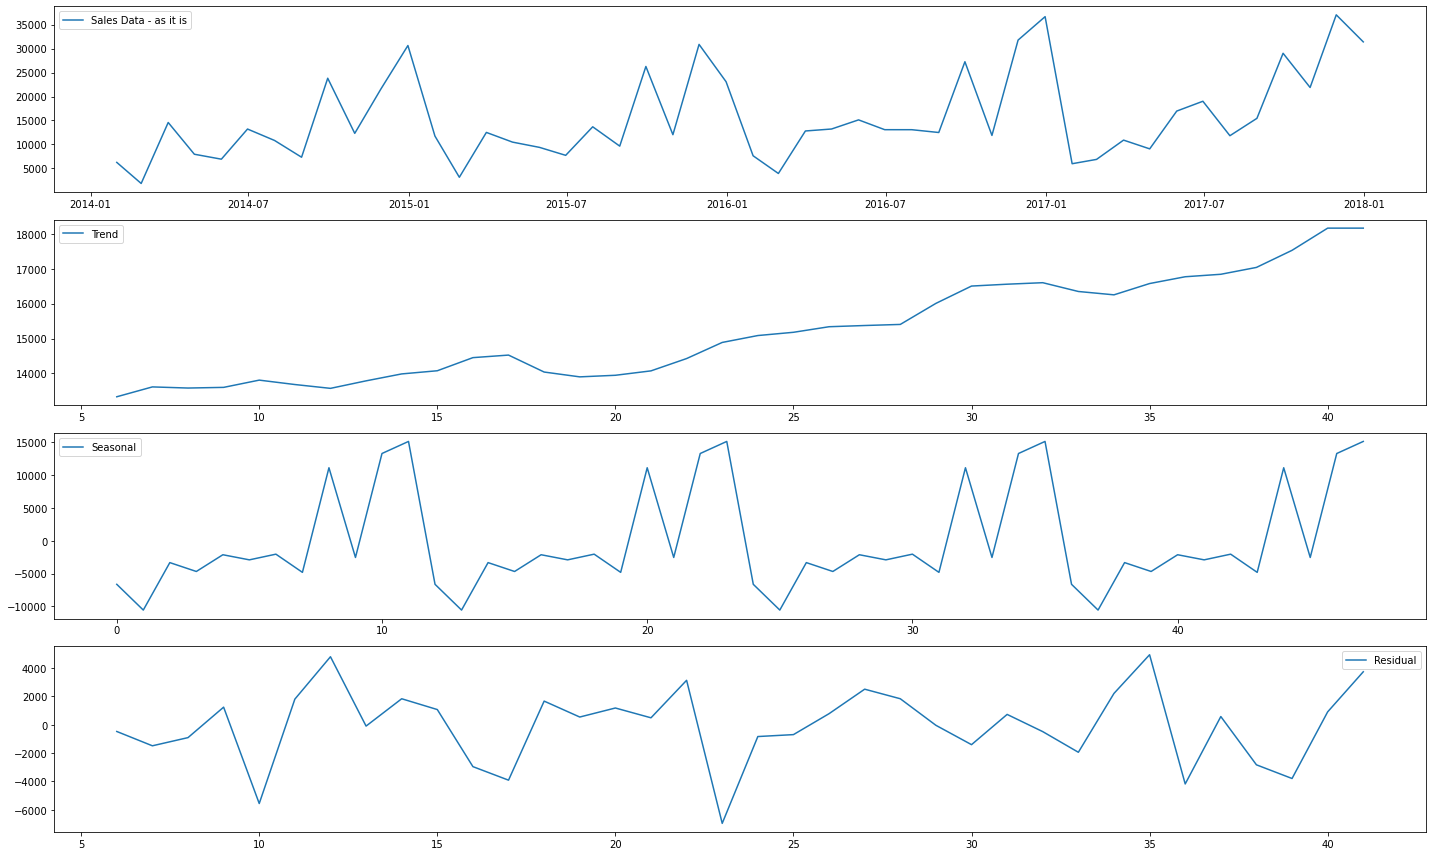

In [74]:
time_series_analysis_plot(monthly_sales,12)

In [76]:
monthly_sales.size

48

#### **Here the data points are too less hence we cannot make an accurate prediction**

In [7]:
weekly_sales = furniture_sales.resample('W').sum()

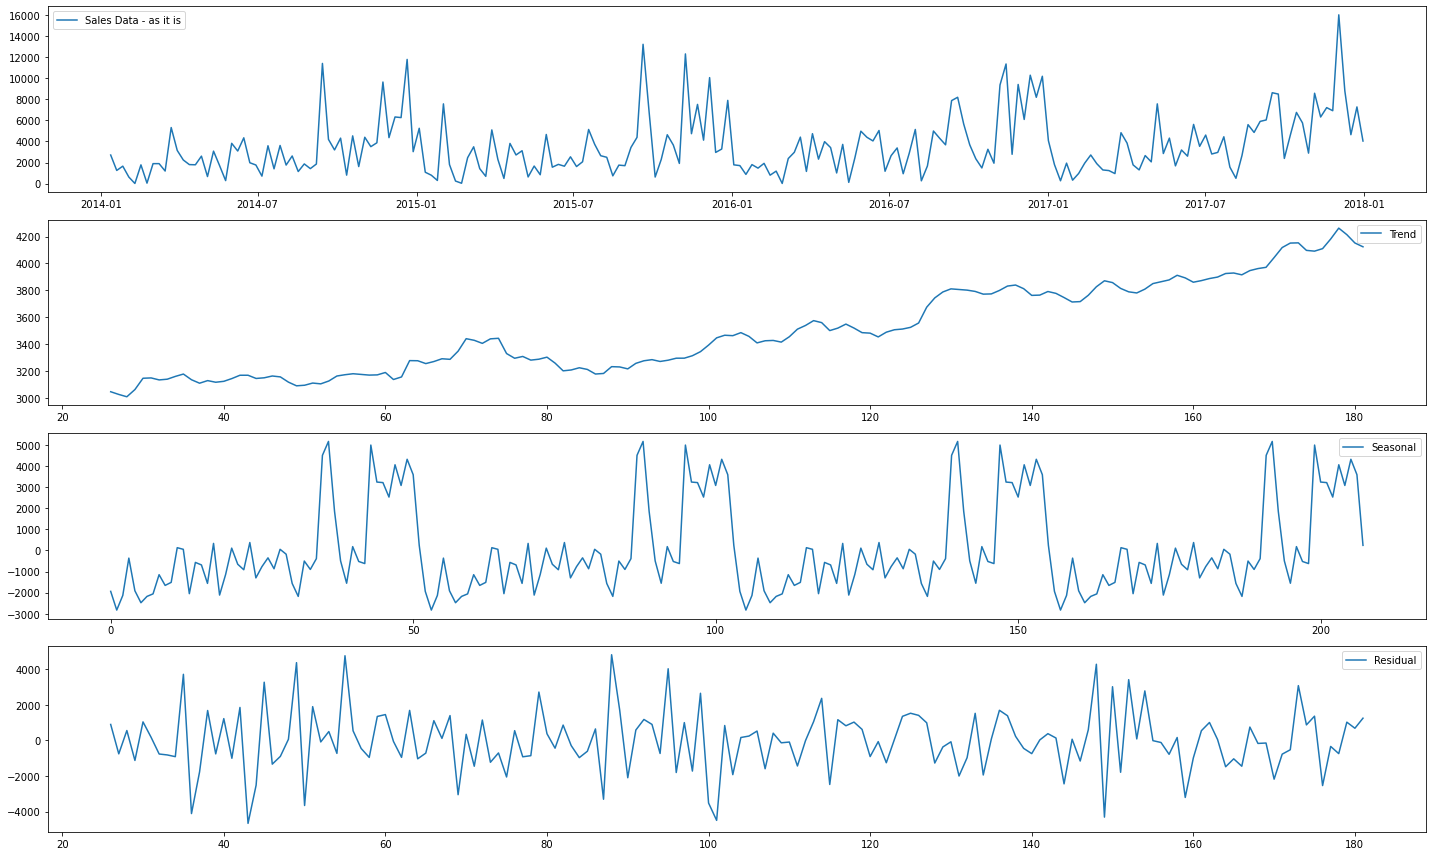

In [8]:
time_series_analysis_plot(weekly_sales,52)

###### <font color="#ff7823">**Data is both seasonal as well as has an upward trend, hence we need to use Triple Exponential Smoothing**

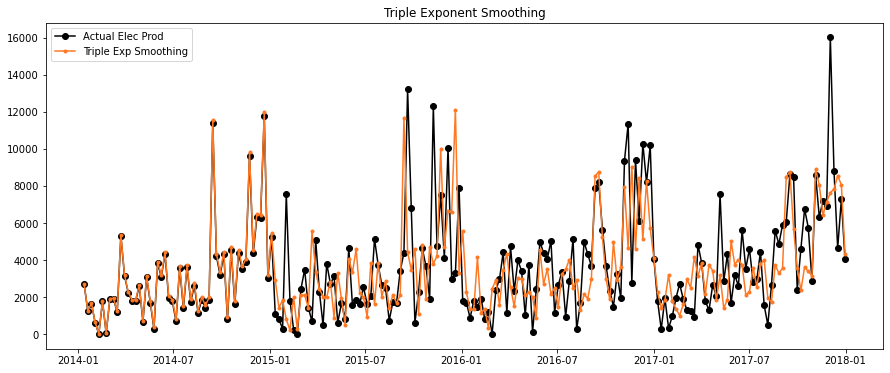

In [24]:
# using Triple Exponential Smoothing as the data is both trending as well as seasonal
model = ExponentialSmoothing(weekly_sales,trend='add',seasonal='add',seasonal_periods=52).fit()

# plot the actual and triple smoothing values
fig,ax = plt.subplots(1,1,figsize=(15,6))
plt.plot(weekly_sales, marker='o',color='black',label='Actual Elec Prod')
plt.plot(model.fittedvalues,marker='.',color='#ff7823',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')
plt.show()

Saving the smoothened data in a new variable

In [25]:
fitted_data=model.fittedvalues

In [85]:
fitted_data

Order Date
2014-01-12    2716.532304
2014-01-19    1258.661085
2014-01-26    1668.209443
2014-02-02     639.960477
2014-02-09      34.877289
                 ...     
2017-12-03    7633.606221
2017-12-10    7834.665569
2017-12-17    8541.800329
2017-12-24    8070.052745
2017-12-31    4354.226244
Freq: W-SUN, Length: 208, dtype: float64

In [26]:
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    dfoutput = pd.Series(result[0:4],index=['tstat','pvalue','lags','obs'])
    pvalue = dfoutput['pvalue']
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

Checking for Stationarity

In [27]:
checkStationarity(fitted_data)

'p-value=0.013661201781551644. Data is stationary'

Plotting PACF and ACF for getting p and q values

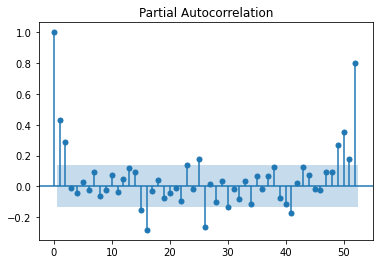

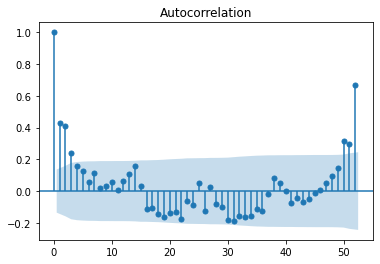

In [28]:
# PACF for Air passengers
plot_pacf(fitted_data,lags=52);
# ACF plot of Air passenger data
plot_acf(fitted_data,lags=52);

p = 2, q = 3, d = 0

In [33]:
# split the data into train and test
ss = int(0.8 * len(fitted_data))

train = (fitted_data.iloc[:ss])
test = (fitted_data.iloc[ss:])
print("train = {}, test = {}".format(len(train), len(test)))

train = 166, test = 42


## <font color="ff7823">As the data is both Seasonal and has a upward trend we need to use Sarima algorithm

## Testing for various seasonal_order (P, D, Q)

In [35]:
for i in range(0,4):
    for j in range(0,3):
        for k in range(0,4):
            model = SARIMAX(train,order=(2,0,3),seasonal_order=(i,j,k,10)).fit()
            results=pd.DataFrame()
            results['Actual'] = weekly_sales.iloc[ss:]
            results['Predictions'] = (model.predict(start='2017-03-31',end='2017-12-31',dynamic=True))
            results.dropna(inplace=True)
            mse = mean_squared_error(results['Actual'], results['Predictions'])
            rsme = np.sqrt(mse)
            rsme_df=pd.DataFrame()
            rsme_df["P"] = i; rsme_df["D"] = j; rsme_df["Q"] = k
            rsme_df["RSME"] = rsme
            print(f"For P = {i}, D = {j} and Q = {k} the RSME is {rsme}")

For P = 0, D = 0 and Q = 0 the RSME is 3279.203702014298
For P = 0, D = 0 and Q = 1 the RSME is 3300.7912480810264
For P = 0, D = 0 and Q = 2 the RSME is 3317.6084307005517
For P = 0, D = 0 and Q = 3 the RSME is 3263.45262384437
For P = 0, D = 1 and Q = 0 the RSME is 4217.311836461789
For P = 0, D = 1 and Q = 1 the RSME is 3382.5996399877154
For P = 0, D = 1 and Q = 2 the RSME is 3494.5177134645696
For P = 0, D = 1 and Q = 3 the RSME is 3498.3135694362054
For P = 0, D = 2 and Q = 0 the RSME is 16500.75729659135
For P = 0, D = 2 and Q = 1 the RSME is 3960.7092083490425
For P = 0, D = 2 and Q = 2 the RSME is 2943.541481323054
For P = 0, D = 2 and Q = 3 the RSME is 3007.7167588436687
For P = 1, D = 0 and Q = 0 the RSME is 3305.485118073722
For P = 1, D = 0 and Q = 1 the RSME is 3284.100791571545
For P = 1, D = 0 and Q = 2 the RSME is 3293.499738743767
For P = 1, D = 0 and Q = 3 the RSME is 3254.5825723491776
For P = 1, D = 1 and Q = 0 the RSME is 3307.526375053707
For P = 1, D = 1 and Q =

For P = 1, D = 2 and Q = 2 the RSME is 2925.98383576337 gives us the best result

In [34]:
def Sarima(train,test,p,d,q,s):
    model = SARIMAX(train,order=(2,0,3),seasonal_order=(p,d,q,s)).fit()
    results=pd.DataFrame()
    results['Actual'] = weekly_sales.iloc[ss:]
    results['Predictions'] = (model.predict(start='2017-03-31',end='2017-12-31',dynamic=True))
    results['Error'] = results['Actual'] - results['Predictions']
    return results,model

Using the obtained data of P, D, Q

In [37]:
sarima_res,sarima_model = Sarima(train,test,1,2,2,52)

In [38]:
sarima_res

,Actual,Predictions,Error
Order Date,,,
2017-03-19,951.6460,NaN,NaN
2017-03-26,4827.3080,NaN,NaN
2017-04-02,3846.4728,2891.102329,955.370471
2017-04-09,1775.1585,656.531045,1118.627455
2017-04-16,1300.0530,4567.352085,-3267.299085
2017-04-23,2660.3620,3780.904508,-1120.542508
2017-04-30,2064.5086,2508.839809,-444.331209
2017-05-07,7563.8318,2004.422882,5559.408918
2017-05-14,2854.3050,2806.014145,48.290855


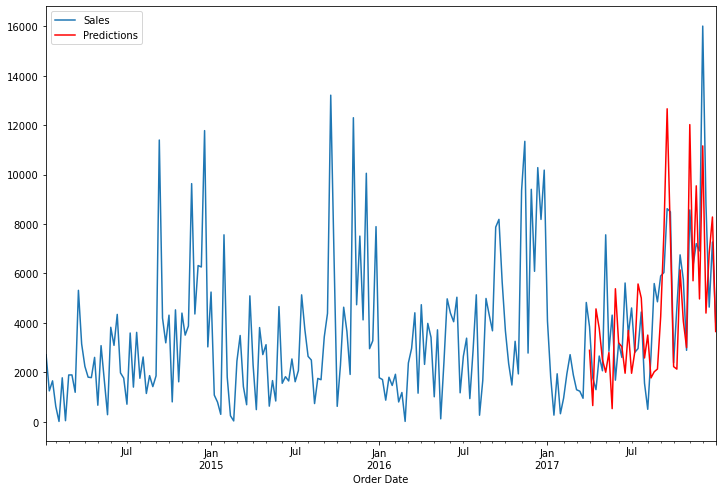

In [59]:
weekly_sales.plot(figsize=(12,8))
sarima_res['Predictions'].plot(figsize=(12,8),color='red')
plt.legend()
plt.show()

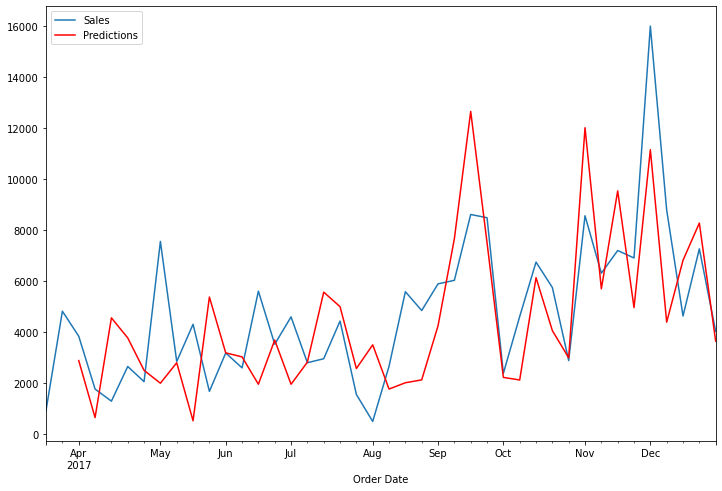

In [56]:
weekly_sales.iloc[ss:].plot(figsize=(12,8))
sarima_res['Predictions'].plot(figsize=(12,8),color='red')
plt.legend()
plt.show()

In [41]:
sarima_res.dropna(inplace=True)

In [42]:
# MSE
msg = 'SARIMA Model. Order=(' + str(2) + ',' + str(0) + ',' + str(4) + ')'
mse1 = mean_squared_error(sarima_res['Actual'], sarima_res['Predictions'])
aic = sarima_model.aic ; bic = sarima_model.bic
print(msg + "\n\tMSE = {}\n\tRMSE = {}\n\tAIC = {}\n\tBIC = {}".format(mse1,np.sqrt(mse1),aic,bic))

SARIMA Model. Order=(2,0,4)
	MSE = 5856869.668773757
	RMSE = 2420.0970370573486
	AIC = 1079.9988683430477
	BIC = 1099.1430778084534


In [58]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  166
Model:             SARIMAX(2, 0, 3)x(1, 2, [1, 2], 52)   Log Likelihood                -530.999
Date:                                 Tue, 05 Jul 2022   AIC                           1079.999
Time:                                         09:50:12   BIC                           1099.143
Sample:                                     01-12-2014   HQIC                          1087.515
                                          - 03-12-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6980      0.107     -6.500      0.000      -0.909      -0.488
ar.L2         -0.9689      0.089    -10.858      0.000      -1.144      -0.794
ma.L1          0.4258      0.234      1.819      0.069      -0.033       0.885
ma.L2          0.6803      0.278      2.447      0.014       0.135       1.225
ma.L3         -0.3543      0.160     -2.221      0.026      -0.667      -0.042
ar.S.L52      -0.0567      2.387     -0.024      0.981      -4.735       4.622
ma.S.L52      -0.1139      2.719     -0.042      0.967      -5.443       5.215
ma.S.L104     -0.4462      0.809     -0.552      0.581      -2.031       1.139
sigma2      1.754e+06   7.35e-06   2.39e+11      0.000    1.75e+06    1.75e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 9.75
Prob(Q):                              0.69   Prob(JB):                         0.01
Heteroskedasticity (H):               1.82   Skew:                             0.49
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.42e+27. Standard errors may be unstable.
"""

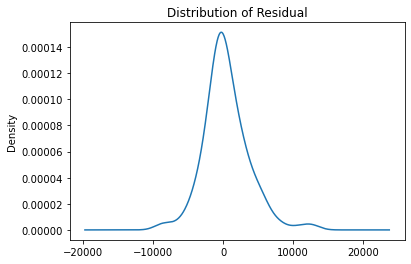

In [44]:
sarima_model.resid.plot(kind="kde")
plt.title("Distribution of Residual")
plt.show()

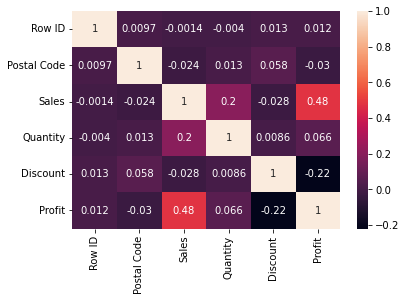

In [54]:
sns.heatmap(data.corr(),annot=True)
plt.show()

### <font color="red"> As seen from None of the fields seem to have a considerable effect on the Sales. Thought profit seems correlated to sales but profit is dependant on Sales and not the vice-versa, hence we cannot consider the same for Exog variable in Sarimax

## Thus for predicting future sales we'll go ahead with SARIMA model itself

In [64]:
furniture_forecast = sarima_model.forecast(100)

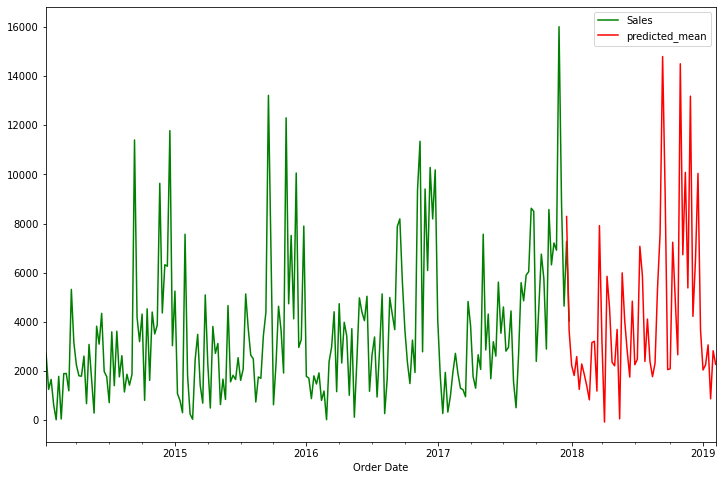

In [84]:
actual=weekly_sales.plot(figsize=(12,8),color="green")
forecast=furniture_forecast.loc["2017-12-24":].plot(figsize=(12,8),color='red')
#plt.legend([actual,forecast],["Actual Sales","Predicted Sales"])
plt.legend()
plt.show()

## We can observe that the forecasted data is quite in Sync with the previous sales